# Dataset Information

#### The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

#### This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


## Attribute Information

#### Input variables (based on physicochemical tests):
#### 1 - fixed acidity
#### 2 - volatile acidity
#### 3 - citric acid
#### 4 - residual sugar
#### 5 - chlorides
#### 6 - free sulfur dioxide
#### 7 - total sulfur dioxide
#### 8 - density
#### 9 - pH
#### 10 - sulphates
#### 11 - alcohol
#### Output variable (based on sensory data):
#### 12 - quality (score between 0 and 10)

# Importing Modules

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
warnings.filterwarnings('ignore')

## Data Collection

In [2]:
# Loading the dataset to Pandas DataFrame
wine_dataset = pd.read_csv(r'C:\Users\ROHIT RAJAN\Downloads\archive\winequality-red.csv')

In [3]:
# number of rows and columns in dataset 
wine_dataset.shape

(1599, 12)

In [4]:
# first five rows of the dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data analysis and visualization

In [7]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


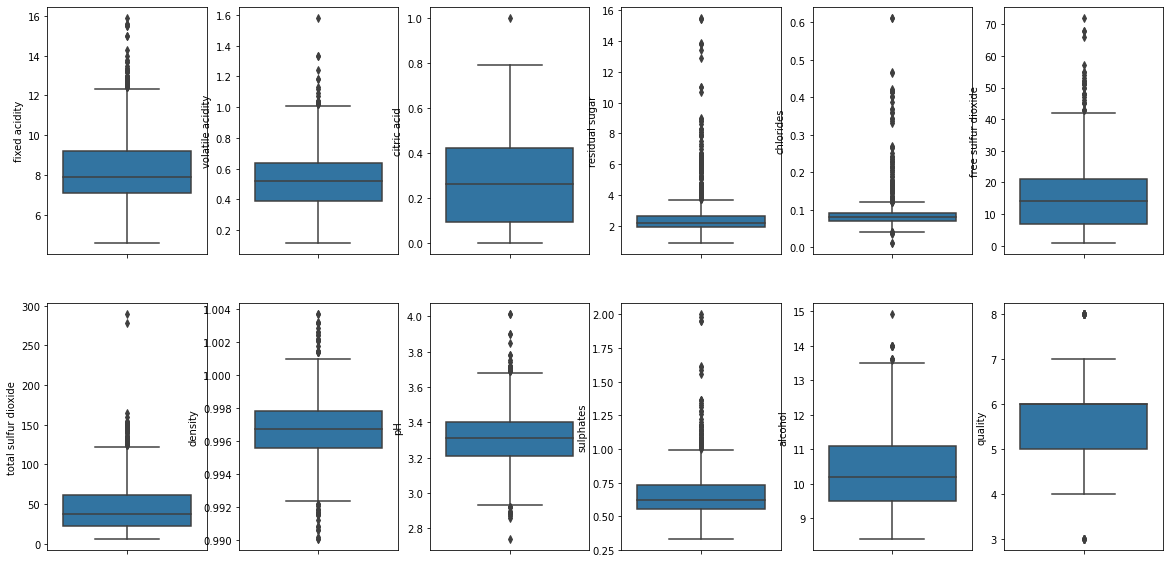

In [91]:
# create box plot
fig, ax = plt.subplots(ncols=6,nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine_dataset.items():
    if col!='type':
        sns.boxplot(y=col,data=wine_dataset, ax=ax[index])
        index += 1

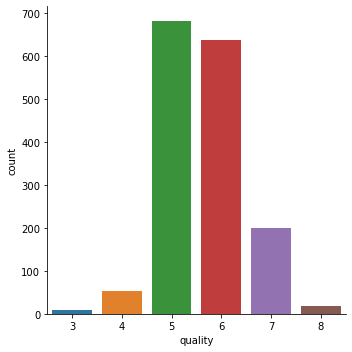

In [8]:
# Checking number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

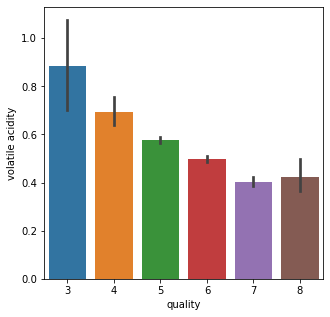

In [9]:
# voalatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'volatile acidity', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

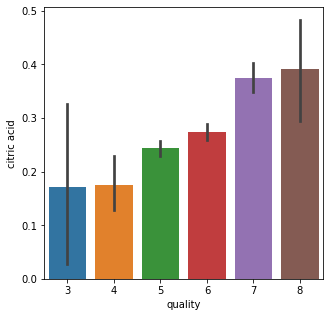

In [10]:
# citric acid content vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'citric acid', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

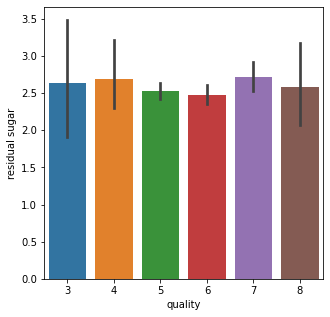

In [11]:
# residual sugar vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'residual sugar', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

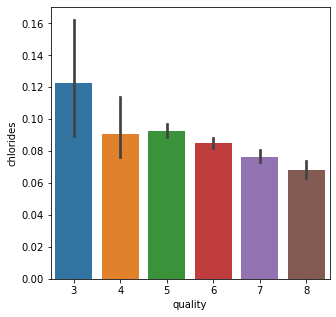

In [16]:
# chloides vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'chlorides', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

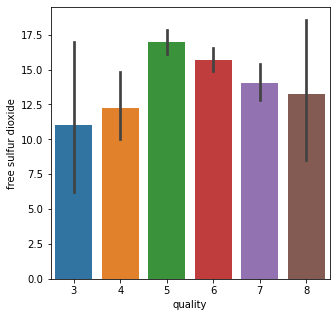

In [18]:
# free sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'free sulfur dioxide', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

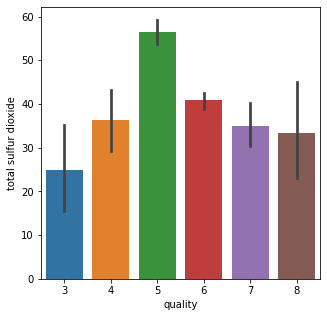

In [19]:
# total sulfur dioxide vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'total sulfur dioxide', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='density'>

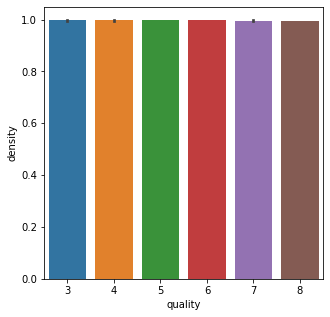

In [20]:
# density vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'density', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='pH'>

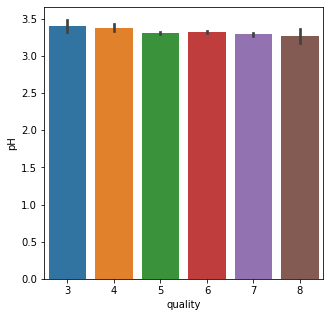

In [21]:
# pH vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'pH', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

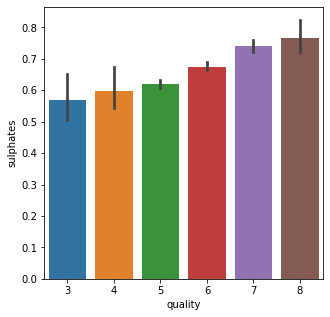

In [23]:
# sulphates  vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'sulphates', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

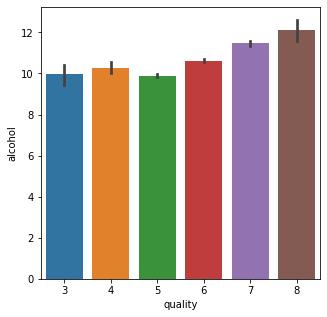

In [24]:
# alcohol  vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'alcohol', data = wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='quality'>

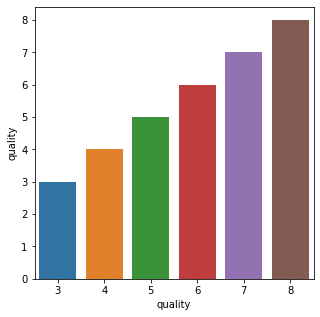

In [25]:
# quality  vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y = 'quality', data = wine_dataset)

## Correlation

In [29]:
correlation = wine_dataset.corr()

<AxesSubplot:>

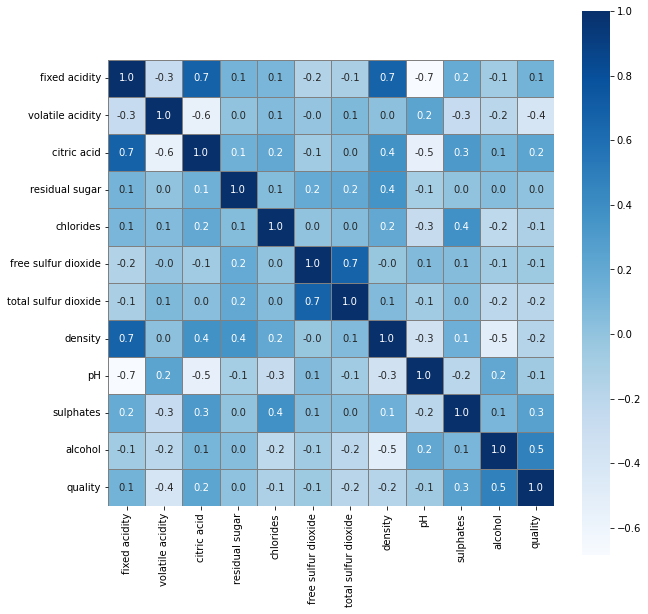

In [56]:
# constructing heatmap to understand the correlation between the columns
plt.figure(figsize=[10,10])
sns.heatmap(correlation, annot= True , fmt='.1f',cbar=True , linewidths=1,linecolor='Grey' , square=True, cmap = 'Blues')

## The strongly correlated items are :
#### 1.fixed acidity and citric acid. 2.free sulphur dioxide and total sulphor dioxide. 3.fixed acidity and density.

#### alcohol and quality.
#### so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

## The weekly correlated items are :
#### 1.citric acid and volatile acidity. 2.fixed acidity and ph. 3.density and alcohol.

#### These are some relations which do not depend on each other at all.

## Data Preprocessing

In [27]:
# seperate the data and Label
X = wine_dataset.drop('quality',axis=1)

In [28]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

## Label Binarization

In [58]:
Y = wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)  # using lambda function

In [59]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


### Train & Test Split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [70]:
print(Y.shape)

(1599,)


In [71]:
print(Y_train.shape)

(1279,)


In [72]:
print(Y_test.shape)

(320,)


### Model Training:
### Random Model Classifier    

In [83]:
model = RandomForestClassifier()

In [84]:
model.fit(X_train, Y_train)


RandomForestClassifier()

### Model Evaluation

### Accuracy Score

In [78]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [79]:
print('Accuracy :', test_data_accuracy)

Accuracy : 0.934375


### Building Predictive System

In [86]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

# changing the input data to anumpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] ==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[1]
Good Quality Wine
